   ## Titanic Survival Prediction

**Problem Statement** : 
The Titanic dataset is used to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

### Data loading

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Data loading
titanic=pd.read_csv('tested.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# Shows first 10 rows of data frame
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Data Pre-processing

In [4]:
# To check number of rows and columns
titanic.shape
print("Rows = ",titanic.shape[0])
print("Columns = ",titanic.shape[1])

Rows =  418
Columns =  12


In [5]:
# To get infomation about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Describe data
titanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                     

In [7]:
# Show columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Checking missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Droping the cabin column from the dataframe because majority of values are missing.
titanic=titanic.drop(columns='Cabin',axis=1)

In [10]:
# Replacing missing values in age columns with its mean value
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# Replacing missing values in fare columns with its mean value
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [11]:
# Verifying the missing values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Statstical data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# Finding the number of people survived and not survived
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [14]:
# Length of data
print("Number of passenger in original data:",len(titanic))

Number of passenger in original data: 418


### Data Visualization

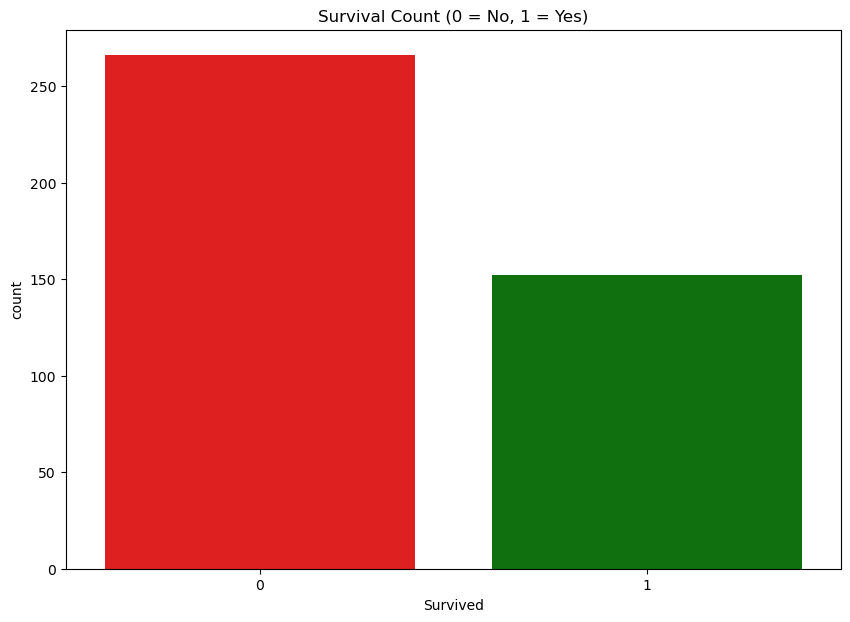

In [15]:
# Create a countplot to visualize the distribution of 'Survived' with custom colors and figsize
plt.figure(figsize=(10, 7))
sns.countplot(x='Survived', data=titanic, palette=["red", "green"])
plt.title('Survival Count (0 = No, 1 = Yes)')

# Display the plot
plt.show()

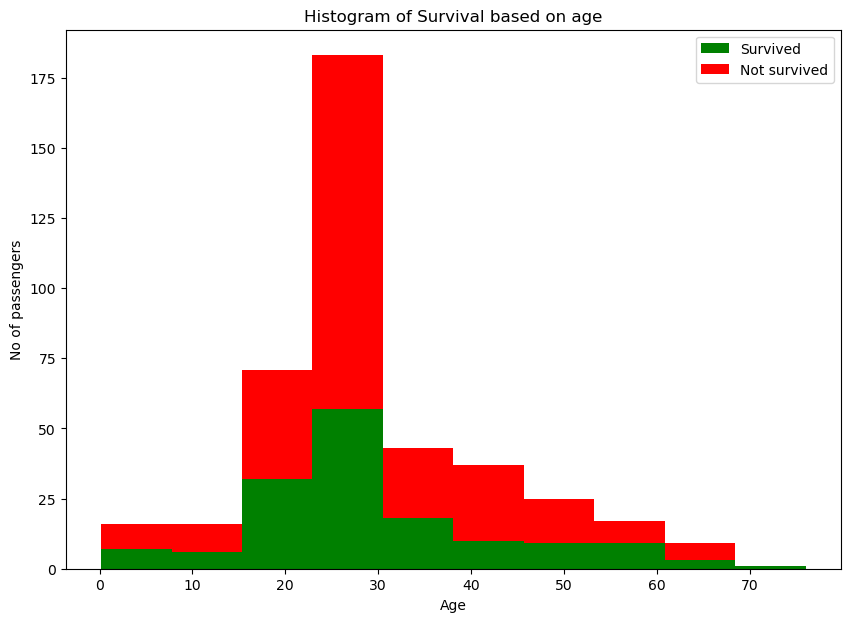

In [16]:
# Survival based on age wise
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Histogram of Survival based on age')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

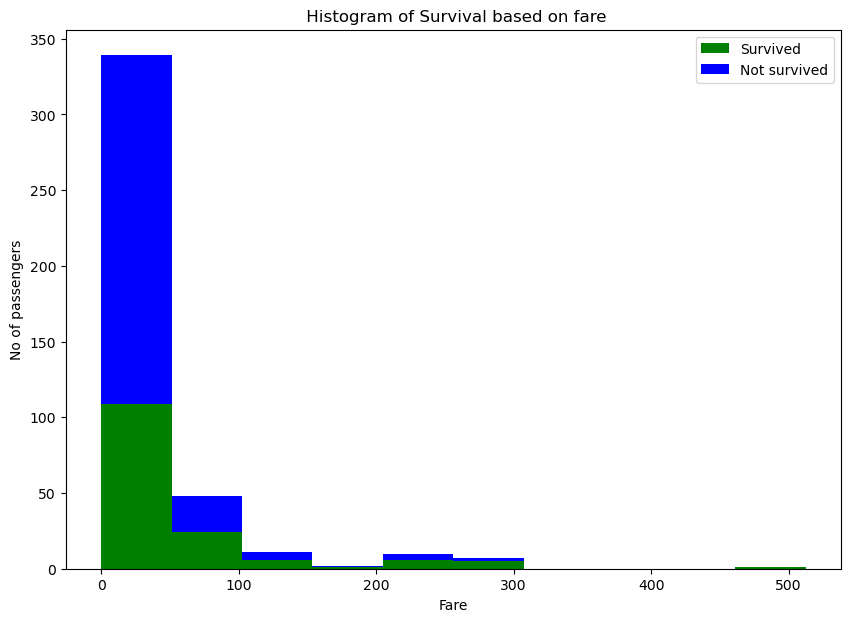

In [17]:
# survival based on fare wise
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [titanic[titanic['Survived']==1]['Fare'], titanic[titanic['Survived']==0]['Fare']], stacked=True, color = ['g','b'],label = ['Survived','Not survived'])
plt.title(' Histogram of Survival based on fare')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

In [18]:
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

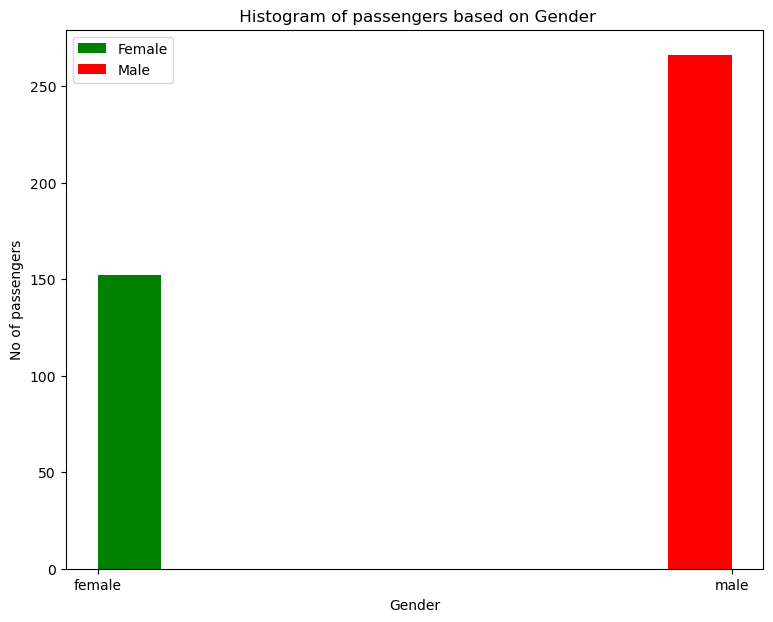

In [19]:
# survival based on gender
fig = plt.figure(figsize =(9, 7))
plt.hist(x = [titanic[titanic['Survived']==1]['Sex'], titanic[titanic['Survived']==0]['Sex']], stacked=True, color = ['g','r'],label = ['Female','Male'])
plt.title(' Histogram of passengers based on Gender')
plt.xlabel('Gender')
plt.ylabel('No of passengers')
plt.legend()

### Functions

In [20]:
def histogram_rep(titanic,col_name, total_rows,x_label, x_labels, title, figsize):
    numeric_data = pd.to_numeric(titanic[col_name], errors='coerce')
    nan_count = numeric_data.isnull().sum()
    percentage_non_numeric = (nan_count / total_rows) * 100
    print(f"Percentage of non-numerical values in the '{col_name}' column: {percentage_non_numeric:.2f}%")

    # Get unique values in the 'previous' column
    unique_values = titanic[col_name].unique()
    print("Unique values in '{col_name}' column:")
    
    # Calculate the percentage of each unique value
    percentage_values = []
    for value in unique_values:
        count = (titanic[col_name] == value).sum()
        percentage = (count / total_rows) * 100
        percentage_values.append(percentage)
        print(f"Value: {value}, Percentage: {percentage:.2f}%")
        
    # Create a histogram
    plt.figure(figsize=figsize)
    plt.bar(unique_values, percentage_values)
    plt.xlabel(x_label)
    plt.ylabel('Percentage')
    plt.title(title)
    plt.xticks(unique_values, x_labels)
    plt.show()

In [21]:
def survival_percentage(data, column_name):
    unique_values = data[column_name].unique()
    
    percentages = {}
    
    for value in unique_values:
        subset = data[data[column_name] == value]
        survived_count = subset["Survived"].sum()
        total_count = len(subset)
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            percentages[value] = percentage
    
    return percentages


In [22]:
def draw_pie_chart(percentages):
    labels = percentages.keys()
    sizes = list(percentages.values())  # Convert dict_values to a list
    
    # Generate a list of shades of blue based on the number of categories
    num_categories = len(labels)
    colors = plt.cm.Blues(np.linspace(0.1, 1, num_categories))
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.pie(sizes, labels=None, colors=colors, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Survival Percentage by Category')
    
    # Add custom legend
    legend_labels = [f'{label} ({sizes[i]:.1f}%)' for i, label in enumerate(labels) if sizes[i] > 0]
    plt.legend(legend_labels, loc='best')
    
    plt.show()

Percentage of non-numerical values in the 'Embarked' column: 100.00%
Unique values in '{col_name}' column:
Value: Q, Percentage: 11.00%
Value: S, Percentage: 64.59%
Value: C, Percentage: 24.40%


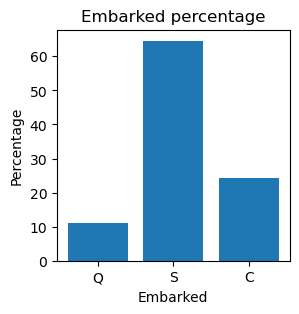

In [23]:
# Histogram
col_name = 'Embarked'
x_label = 'Embarked'
x_labels = ['Q','S','C']
title = 'Embarked percentage'
figsize = (3,3)

histogram_rep(titanic,col_name, len(titanic),x_label, x_labels, title, figsize)

precentage of Q who survived: 52.17%
precentage of S who survived: 32.59%
precentage of C who survived: 39.22%


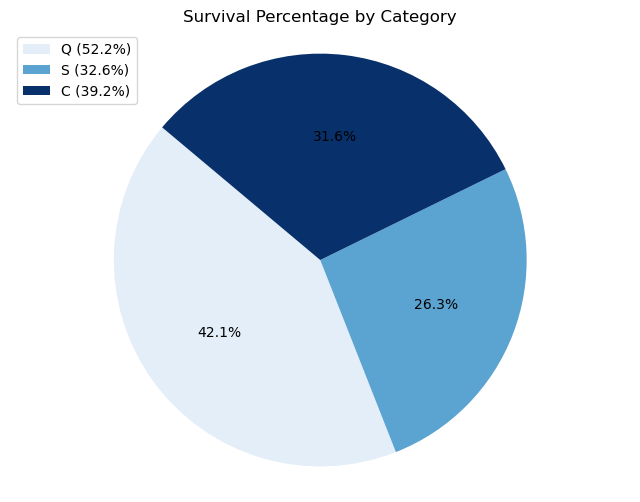

In [24]:
# Pie Chart
embarked_result = survival_percentage(titanic, "Embarked")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(embarked_result)

Percentage of non-numerical values in the 'Pclass' column: 0.00%
Unique values in '{col_name}' column:
Value: 3, Percentage: 52.15%
Value: 2, Percentage: 22.25%
Value: 1, Percentage: 25.60%


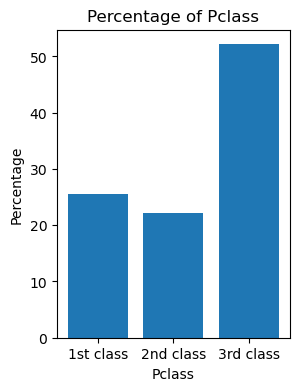

In [25]:
# Histogram
col_name = 'Pclass'
x_label = 'Pclass'
x_labels = ['3rd class', '2nd class', '1st class']
title = 'Percentage of Pclass'
figsize = (3,4)

histogram_rep(titanic,col_name, len(titanic),x_label, x_labels, title, figsize)

precentage of 3 who survived: 33.03%
precentage of 2 who survived: 32.26%
precentage of 1 who survived: 46.73%


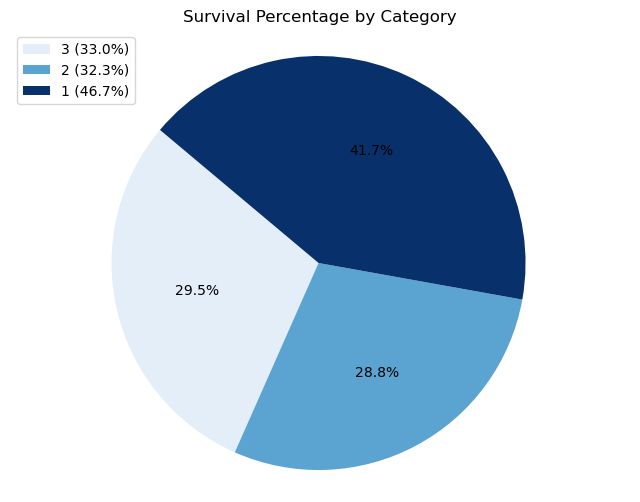

In [26]:
# Pie Chart
embarked_result = survival_percentage(titanic, "Pclass")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")
    
draw_pie_chart(embarked_result)

In [27]:
# Encoding the categorical columns
titanic['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [28]:
# Converting categorical columns into numerical columns
titanic.replace({'Sex':{'male':0,'female':1}}, inplace=True)
titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [30]:
# Drop unnecessary columns
titanic = titanic.drop(columns=['Name', 'PassengerId', 'Ticket'], axis=1)

In [31]:
# Separating features and Target
X=titanic.drop(['Survived'],axis=1)
Y=titanic['Survived']

In [32]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [33]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


**Spliting training and test data**

In [34]:
 X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


**Model Training - Logistic Regression**

In [36]:
#Logestic Regresssion

model=LogisticRegression()

In [37]:
model.fit(X_train, Y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation**

In [38]:
# Accuracy on training data

X_train_prediction=model.predict(X_train)

In [39]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [40]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

print('Accuracy score of training data :{:.2f}%'.format(training_data_accuracy*100 ))

Accuracy score of training data :100.00%


In [41]:
# Accuracy on test data

X_test_prediction=model.predict(X_test)

In [42]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [43]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)

print('Accuracy score of test data :{:.2f}%'.format(testing_data_accuracy*100 ))

Accuracy score of test data :100.00%


In [44]:
confusion_matrix(Y_test,X_test_prediction)

array([[51,  0],
       [ 0, 33]], dtype=int64)

In [45]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



**Conclusion**

The logistic algorithm is likely to be a very strong model for the given problem.logistic regression algorithm's strength and performance on the Titanic dataset effectively.It has learned the underlying patterns and  is capable of making accurate predictions in training data on given 'Titanic' dataset.